In [2]:
import pickle
import torch
import cv2
def read_pkl(path):
    with open(path, 'rb') as f:
        data1 = pickle.load(f)
    return data1
path ='/nas/Dataset/Phoenix/phoenix-2014-keypoints.pkl'
data = read_pkl(path)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load image data for each frame
def load_image(video_key, frame_index):
    # Adjust the path to match your dataset structure
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Visualize 10 frames of a specific video key
video_key_target = "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute"
frames_to_display = 10  # Number of frames to visualize

# Iterate through each video
for video_key, video_data in data.items():
    if video_key != video_key_target:
        continue  # Skip other videos

    keypoints = video_data['keypoints']

    # Iterate through each frame
    for frame_index, frame_keypoints in enumerate(keypoints):
        if frame_index >= frames_to_display:
            break  # Stop after visualizing 10 frames

        frame_image = load_image(video_key, frame_index)  # Load the corresponding image
        frame_image = cv2.cvtColor(frame_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        # Display the frame and keypoints
        plt.imshow(frame_image)
        plt.scatter(frame_keypoints[:, 0], frame_keypoints[:, 1], color='red', s=5)
        plt.title(f"Frame {frame_index}")
        plt.show()

    break  # Exit the loop after processing the target video key


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Indices for left and right hands in the keypoints array
LEFT_HAND_INDICES = range(91, 112)  # Adjust based on your dataset
RIGHT_HAND_INDICES = range(112, 133)  # Adjust based on your dataset

# Function to load each frame's image
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"  
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Set a limit for visualizing frames for comparison
    max_frames = 10
    fig, axes = plt.subplots(1, max_frames, figsize=(20, 5))

    for frame_index in range(min(max_frames, len(keypoints) - 1)):
        frame_image = load_image(frame_index, video_key)
        frame_image = cv2.cvtColor(frame_image, cv2.COLOR_BGR2RGB)
        
        frame_keypoints = keypoints[frame_index]
        
        # Extract only hand keypoints
        left_hand_points = frame_keypoints[LEFT_HAND_INDICES]
        right_hand_points = frame_keypoints[RIGHT_HAND_INDICES]

        # Display the current frame's image in a subplot
        ax = axes[frame_index]
        ax.imshow(frame_image)

        # Plot left and right hand keypoints for each frame
        ax.scatter(left_hand_points[:, 0], left_hand_points[:, 1], color='blue', s=5, label="Left Hand")
        ax.scatter(right_hand_points[:, 0], right_hand_points[:, 1], color='green', s=5, label="Right Hand")
        
        ax.set_title(f"Frame {frame_index}")
        ax.axis('off')
        
    plt.suptitle("Hand Movements Across Frames")
    plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load only hand keypoints based on indices (left-hand and right-hand keypoints)
left_hand_keypoints_indices = list(range(91, 112))  # Example indices for left hand
right_hand_keypoints_indices = list(range(112, 133))  # Example indices for right hand

# Function to load each frame image
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Limit visualization to 10 frames
    for frame_index in range(10):
        frame_keypoints = keypoints[frame_index]
        frame_image = load_image(frame_index, video_key)

        # Convert BGR (OpenCV format) to RGB (Matplotlib format)
        frame_image = cv2.cvtColor(frame_image, cv2.COLOR_BGR2RGB)

        # Extract only hand keypoints for visualization
        left_hand_points = frame_keypoints[left_hand_keypoints_indices]
        right_hand_points = frame_keypoints[right_hand_keypoints_indices]

        # Plot the image and hand keypoints
        plt.imshow(frame_image)
        plt.scatter(left_hand_points[:, 0], left_hand_points[:, 1], color='blue', s=10, label='Left Hand')
        plt.scatter(right_hand_points[:, 0], right_hand_points[:, 1], color='green', s=10, label='Right Hand')

        plt.title(f"Frame {frame_index} - Hand Keypoints")
        plt.legend()
        plt.show()


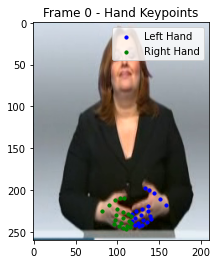

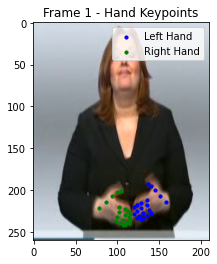

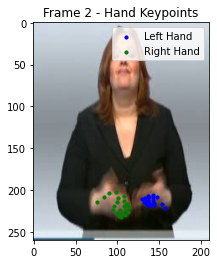

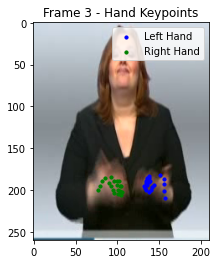

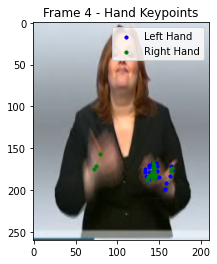

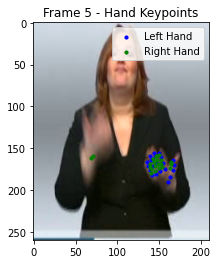

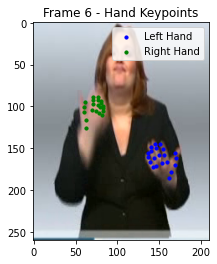

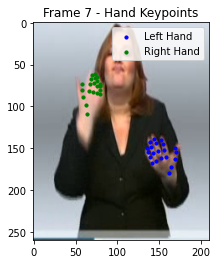

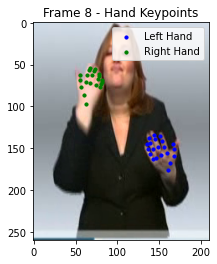

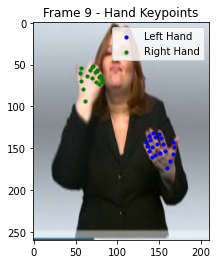

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load only hand keypoints based on indices (left-hand and right-hand keypoints)
left_hand_keypoints_indices = list(range(91, 112))  # Example indices for left hand
right_hand_keypoints_indices = list(range(112, 133))  # Example indices for right hand

# Function to load each frame image
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Limit visualization to 10 frames
    for frame_index in range(10):
        frame_keypoints = keypoints[frame_index]
        frame_image = load_image(frame_index, video_key)

        # Convert BGR (OpenCV format) to RGB (Matplotlib format)
        frame_image = cv2.cvtColor(frame_image, cv2.COLOR_BGR2RGB)

        # Extract only hand keypoints for visualization
        left_hand_points = frame_keypoints[left_hand_keypoints_indices]
        right_hand_points = frame_keypoints[right_hand_keypoints_indices]

        # Plot the image and hand keypoints
        plt.imshow(frame_image)
        plt.scatter(left_hand_points[:, 0], left_hand_points[:, 1], color='blue', s=10, label='Left Hand')
        plt.scatter(right_hand_points[:, 0], right_hand_points[:, 1], color='green', s=10, label='Right Hand')

        plt.title(f"Frame {frame_index} - Hand Keypoints")
        plt.legend()
        plt.show()

    # Stop after 10 frames for each video without manual interruption
    break


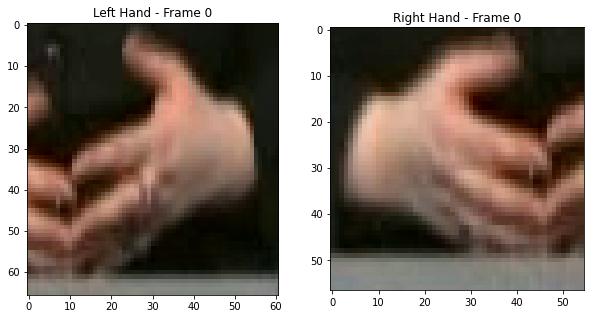

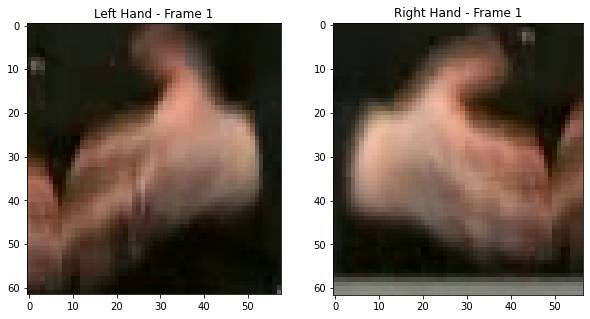

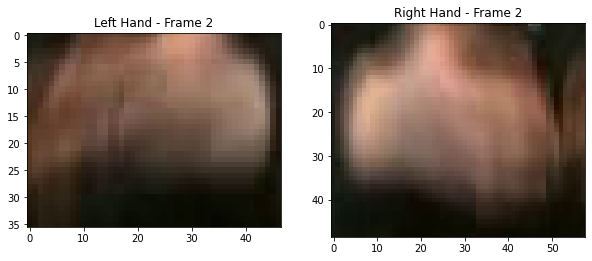

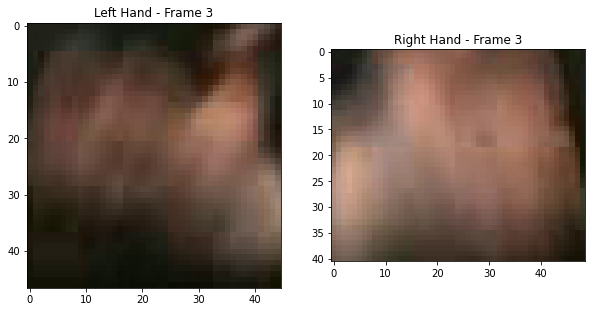

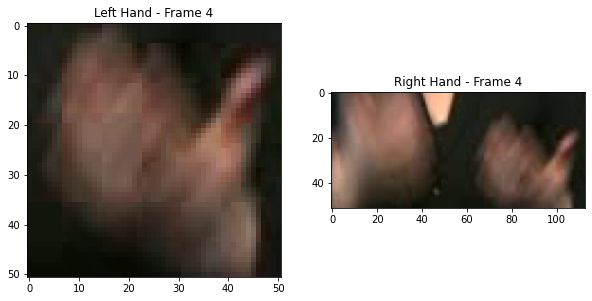

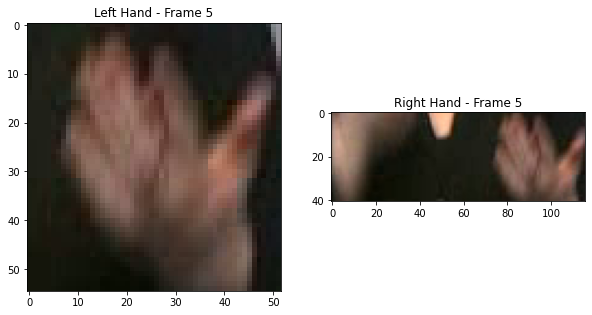

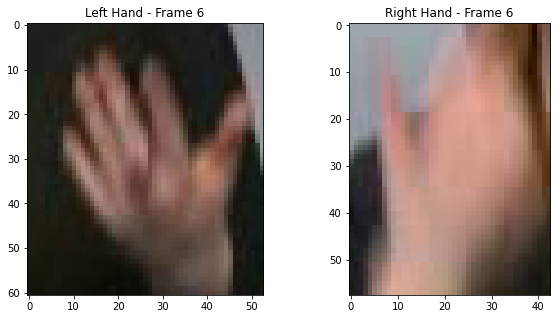

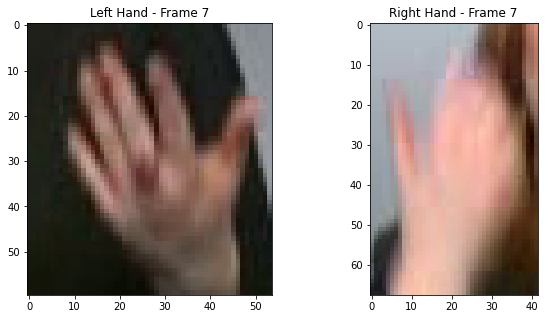

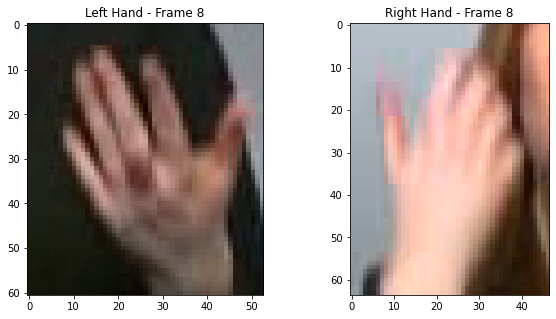

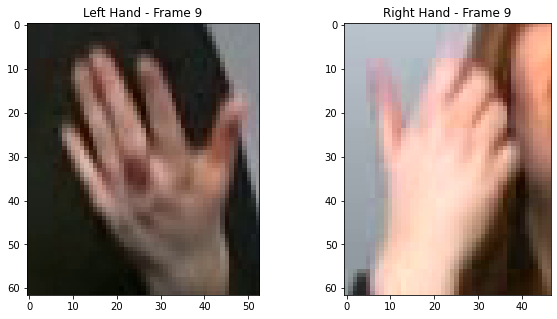

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Hand keypoint indices (left and right hand)
left_hand_keypoints_indices = list(range(91, 112))  # Assuming these are left hand indices
right_hand_keypoints_indices = list(range(112, 133))  # Assuming these are right hand indices

# Function to load each frame image
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Function to crop the hand region given keypoints
def crop_hand_region(image, hand_points):
    # Select only x, y coordinates (ignore confidence if it exists)
    hand_points = hand_points[:, :2]

    x_min, y_min = np.min(hand_points, axis=0).astype(int)
    x_max, y_max = np.max(hand_points, axis=0).astype(int)

    # Add padding around the hand bounding box if desired
    padding = 10
    x_min = max(0, x_min - padding)
    y_min = max(0, y_min - padding)
    x_max = min(image.shape[1], x_max + padding)
    y_max = min(image.shape[0], y_max + padding)

    # Crop and return the hand image
    return image[y_min:y_max, x_min:x_max]

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Limit visualization to 10 frames
    for frame_index in range(10):
        frame_keypoints = keypoints[frame_index]
        frame_image = load_image(frame_index, video_key)

        # Convert BGR (OpenCV format) to RGB (Matplotlib format)
        frame_image_rgb = cv2.cvtColor(frame_image, cv2.COLOR_BGR2RGB)

        # Extract hand keypoints
        left_hand_points = frame_keypoints[left_hand_keypoints_indices]
        right_hand_points = frame_keypoints[right_hand_keypoints_indices]

        # Crop left and right hand regions
        left_hand_crop = crop_hand_region(frame_image_rgb, left_hand_points)
        right_hand_crop = crop_hand_region(frame_image_rgb, right_hand_points)

        # Display the cropped hand images
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(left_hand_crop)
        axes[0].set_title(f"Left Hand - Frame {frame_index}")
        axes[1].imshow(right_hand_crop)
        axes[1].set_title(f"Right Hand - Frame {frame_index}")
        plt.show()

    # Stop after 10 frames for each video without manual interruption
    break


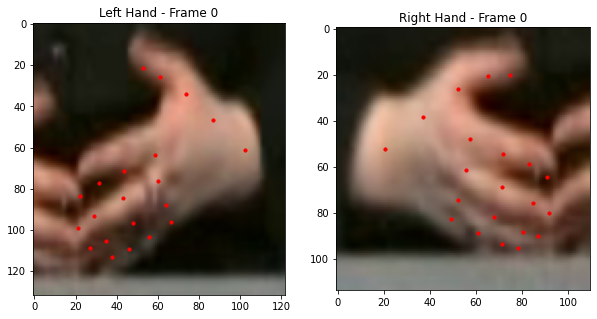

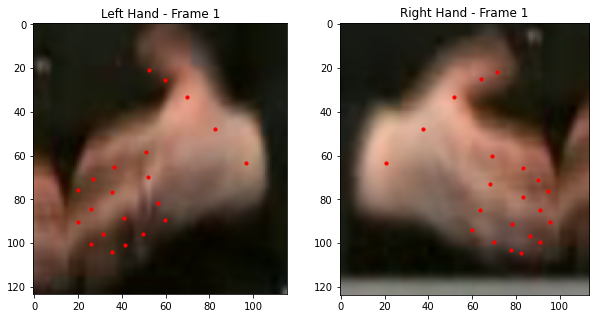

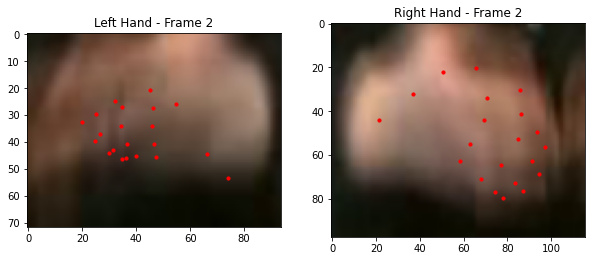

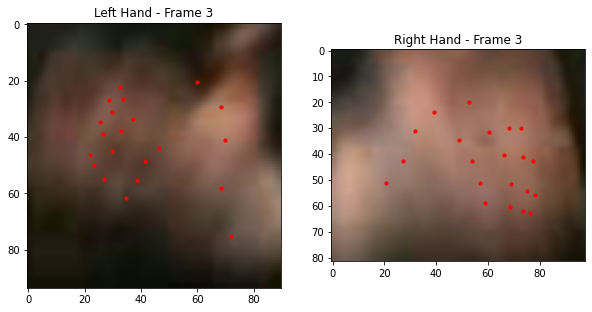

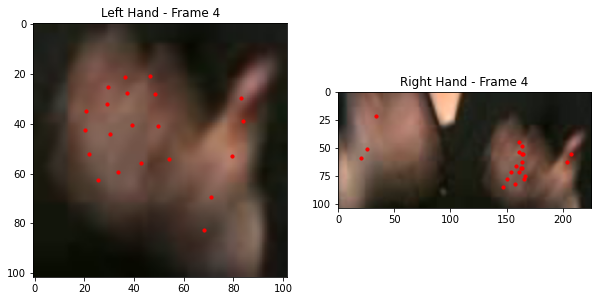

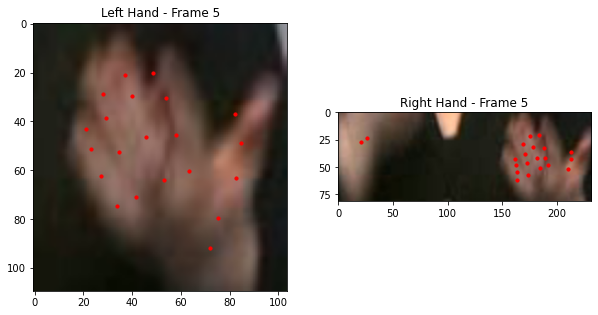

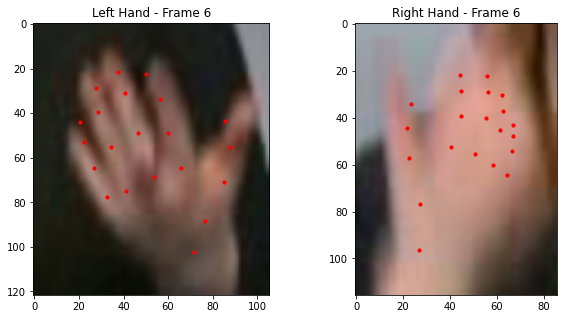

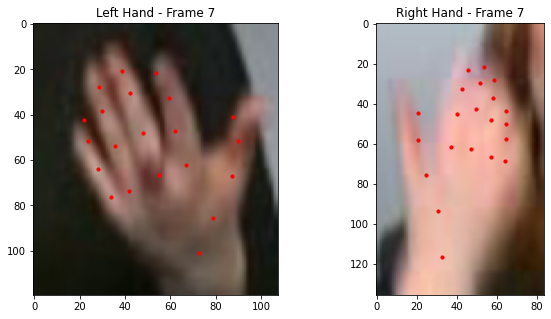

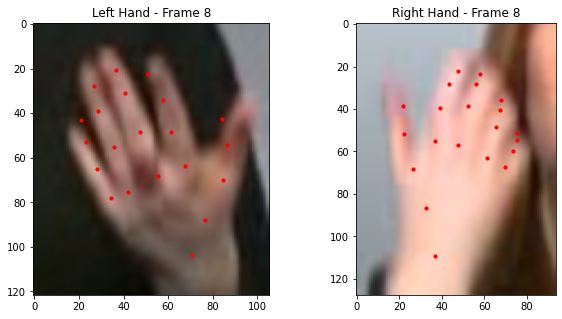

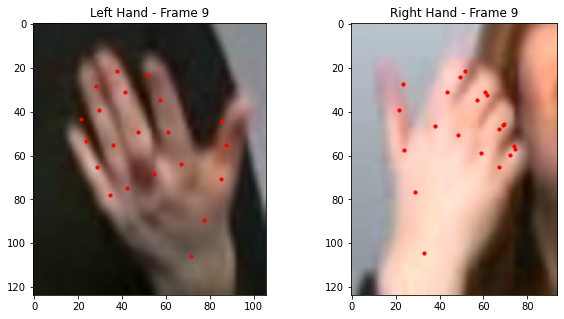

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Hand keypoint indices (left and right hand)
left_hand_keypoints_indices = list(range(91, 112))  # Assuming these are left hand indices
right_hand_keypoints_indices = list(range(112, 133))  # Assuming these are right hand indices

# Function to load each frame image
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Function to crop and upscale hand region, with keypoints overlay
def crop_and_upscale_hand(image, hand_points, upscale_factor=2):
    # Select only x, y coordinates (ignore confidence if it exists)
    hand_points = hand_points[:, :2]

    x_min, y_min = np.min(hand_points, axis=0).astype(int)
    x_max, y_max = np.max(hand_points, axis=0).astype(int)

    # Add padding around the hand bounding box if desired
    padding = 10
    x_min = max(0, x_min - padding)
    y_min = max(0, y_min - padding)
    x_max = min(image.shape[1], x_max + padding)
    y_max = min(image.shape[0], y_max + padding)

    # Crop the hand image
    hand_crop = image[y_min:y_max, x_min:x_max]

    # Upscale the cropped hand image
    hand_crop_upscaled = cv2.resize(hand_crop, (0, 0), fx=upscale_factor, fy=upscale_factor, interpolation=cv2.INTER_LINEAR)

    # Scale keypoints to match the upscaled image size
    upscaled_hand_points = (hand_points - [x_min, y_min]) * upscale_factor

    return hand_crop_upscaled, upscaled_hand_points

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Limit visualization to the first 10 frames
    for frame_index in range(10):
        frame_keypoints = keypoints[frame_index]
        frame_image = load_image(frame_index, video_key)

        # Convert BGR (OpenCV format) to RGB (Matplotlib format)
        frame_image_rgb = cv2.cvtColor(frame_image, cv2.COLOR_BGR2RGB)

        # Extract hand keypoints
        left_hand_points = frame_keypoints[left_hand_keypoints_indices]
        right_hand_points = frame_keypoints[right_hand_keypoints_indices]

        # Crop, upscale, and overlay keypoints for each hand
        left_hand_crop, left_hand_keypoints = crop_and_upscale_hand(frame_image_rgb, left_hand_points)
        right_hand_crop, right_hand_keypoints = crop_and_upscale_hand(frame_image_rgb, right_hand_points)

        # Plot upscaled hands with keypoints
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        
        # Left hand plot
        axes[0].imshow(left_hand_crop)
        axes[0].scatter(left_hand_keypoints[:, 0], left_hand_keypoints[:, 1], color='red', s=10)
        axes[0].set_title(f"Left Hand - Frame {frame_index}")
        
        # Right hand plot
        axes[1].imshow(right_hand_crop)
        axes[1].scatter(right_hand_keypoints[:, 0], right_hand_keypoints[:, 1], color='red', s=10)
        axes[1].set_title(f"Right Hand - Frame {frame_index}")
        
        plt.show()

    # Stop after 10 frames without manual interruption
    break


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Assuming each video has multiple resolution options within a folder
def load_highest_resolution_image(frame_index, video_key):
    # Define the directory structure and common file naming patterns
    base_dir = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}"
    image_pattern = f"{base_dir}_pid0_fn{frame_index:03d}"  # Basic file pattern without resolution
    
    # Check all files matching this frame in the directory to find the highest resolution
    matching_files = [f for f in os.listdir(base_dir) if f.startswith(image_pattern)]
    if not matching_files:
        raise FileNotFoundError("No matching image files found for frame index.")
    
    # Load all images and select the one with the highest resolution
    images = [cv2.imread(os.path.join(base_dir, f)) for f in matching_files]
    highest_res_image = max(images, key=lambda img: img.shape[0] * img.shape[1])  # Select by image area
    
    return highest_res_image

# Function to crop hand regions at higher resolution
def crop_hand_region(image, hand_points, buffer=20):
    x_min, y_min = np.min(hand_points, axis=0).astype(int) - buffer
    x_max, y_max = np.max(hand_points, axis=0).astype(int) + buffer
    x_min, y_min = max(0, x_min), max(0, y_min)
    return image[y_min:y_max, x_min:x_max]

# Load keypoints as before and set up visualization
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']
    for frame_index, frame_keypoints in enumerate(keypoints[:10]):  # Limit to first 10 frames
        frame_image = load_highest_resolution_image(frame_index, video_key)
        frame_image_rgb = cv2.cvtColor(frame_image, cv2.COLOR_BGR2RGB)

        # Separate left and right hand keypoints (e.g., left_hand_points and right_hand_points)
        left_hand_crop = crop_hand_region(frame_image_rgb, left_hand_points)
        right_hand_crop = crop_hand_region(frame_image_rgb, right_hand_points)

        # Visualize the crops and keypoints
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
        ax1.imshow(left_hand_crop)
        ax1.scatter(left_hand_points[:, 0], left_hand_points[:, 1], color='blue', s=5)
        ax1.set_title(f"Left Hand - Frame {frame_index}")

        ax2.imshow(right_hand_crop)
        ax2.scatter(right_hand_points[:, 0], right_hand_points[:, 1], color='green', s=5)
        ax2.set_title(f"Right Hand - Frame {frame_index}")

        plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute'